<a href="https://colab.research.google.com/github/whoisammmmar/Data-Visualization-Using-Python-Sales-Data-Description/blob/main/Sales_Data_Visualization_Project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊  Data Visualization Using Python - Sales Data Description

**Objective:**
Use basic python data visualization libraries to explore and present sales data insights.

**Input:**
OrderID,Product,Category,Region,Date,UnitsSold,Revenue



In [ ]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
# 📁 Upload and read the dataset
from google.colab import files
uploaded = files.upload()

# Replace with your actual file name if different
df = pd.read_csv('sample_sales_data.csv')
df.head()

Saving sample_sales_data.csv to sample_sales_data.csv


,OrderID,Product,Category,Region,Date,UnitsSold,Revenue
0,1001,Headphones,Accessories,West,2023-01-01,4,400
1,1002,Monitor,Accessories,East,2023-01-02,5,1500
2,1003,Smartphone,Accessories,West,2023-01-03,5,3000
3,1004,Monitor,Electronics,East,2023-01-04,7,2100
4,1005,Monitor,Accessories,West,2023-01-05,4,1200


In [ ]:
# 🔍 Explore the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OrderID    200 non-null    int64 
 1   Product    200 non-null    object
 2   Category   200 non-null    object
 3   Region     200 non-null    object
 4   Date       200 non-null    object
 5   UnitsSold  200 non-null    int64 
 6   Revenue    200 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 11.1+ KB


,OrderID,UnitsSold,Revenue
count,200.000000,200.000000,200.000000
mean,1100.500000,4.840000,1850.000000
std,57.879185,2.597718,1829.195116
min,1001.000000,1.000000,50.000000
25%,1050.750000,3.000000,400.000000
50%,1100.500000,5.000000,1200.000000
75%,1150.250000,7.000000,2850.000000
max,1200.000000,9.000000,7200.000000


In [ ]:
# 🧹 Data cleaning and preprocessing
df.isnull().sum()
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

## 📊 Total Revenue by Product Category

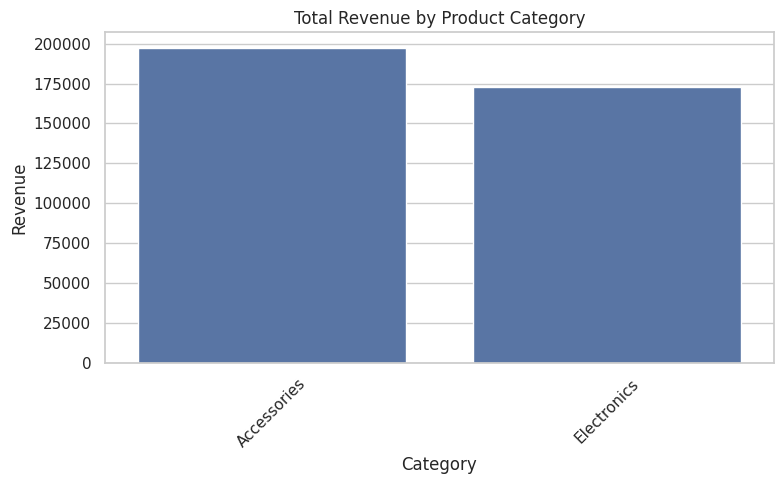

In [ ]:
category_sales = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Revenue by Product Category')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Monthly Revenue Trend

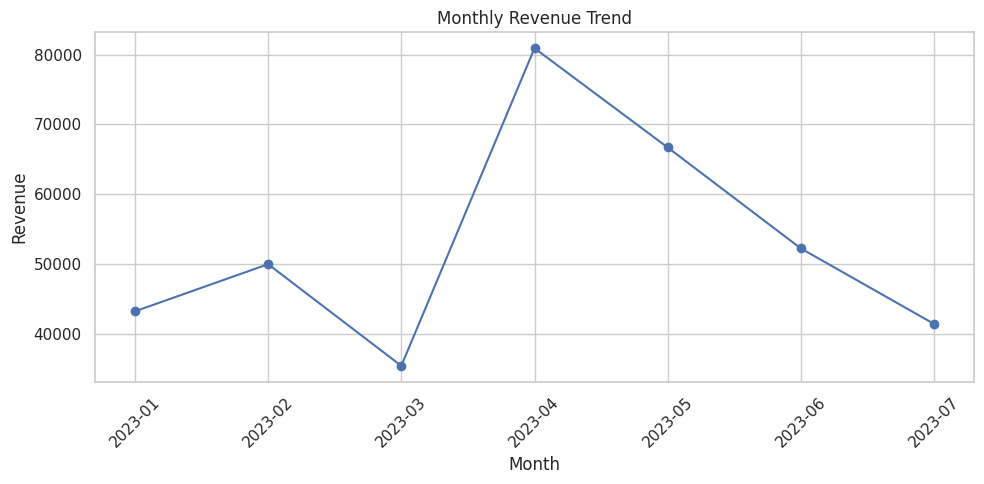

In [ ]:
monthly_sales = df.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🥧 Revenue Distribution by Region

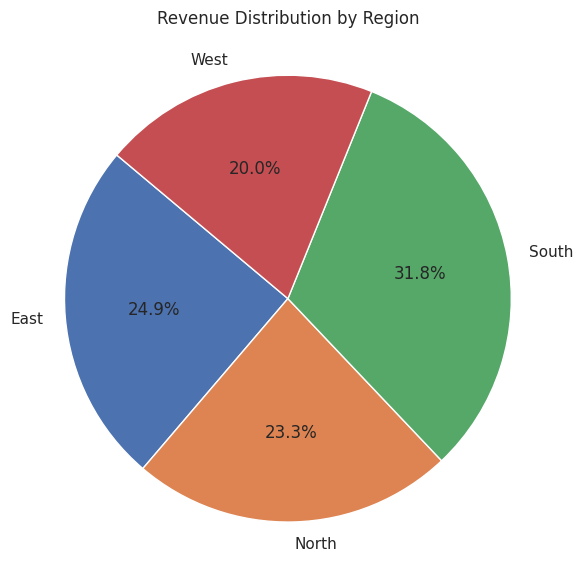

In [ ]:
region_sales = df.groupby('Region')['Revenue'].sum()
plt.figure(figsize=(6, 6))
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 📉 Order Value Distribution

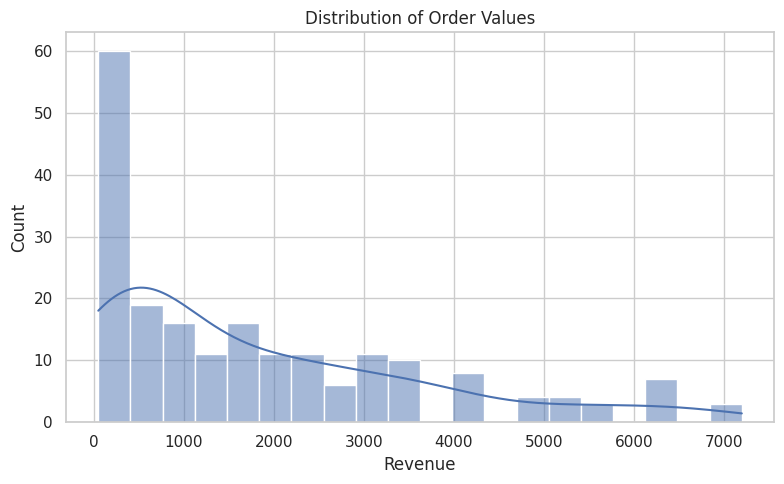

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Revenue'], bins=20, kde=True)
plt.title('Distribution of Order Values')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()